In [1]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [2]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [3]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


In [4]:
# Let's check correlation between elevation_gain and distance
print(rr_2016['elevation_gain'].corr(rr_2016['distance']))

# Checking correlation between elevation_gain  and speed
print(rr_2016['elevation_gain'].corr(rr_2016['speed']))


-0.12151987774133946
-0.817031929101688


In [5]:
# calculating correlation between all columns in dataframe due to we see there is no relationship with power, 
# we drop it 
print(rr_2016.corr())

## Let's check correlation on the dataframe
new_df = rr_2016.drop(['power'], axis=1)
new_df.corr ()



                latitude  longitude  elevation  temperature  power   cadence  \
latitude        1.000000   0.896230   0.902604    -0.243038    NaN -0.053667   
longitude       0.896230   1.000000   0.705915    -0.262367    NaN -0.114852   
elevation       0.902604   0.705915   1.000000    -0.116702    NaN  0.022030   
temperature    -0.243038  -0.262367  -0.116702     1.000000    NaN  0.077495   
power                NaN        NaN        NaN          NaN    NaN       NaN   
cadence        -0.053667  -0.114852   0.022030     0.077495    NaN  1.000000   
hr             -0.164643  -0.151830  -0.240242    -0.111024    NaN -0.188127   
distance       -0.028951  -0.036753   0.034963     0.002694    NaN  0.091947   
elevation_gain  0.003261  -0.007010   0.015736     0.126452    NaN  0.505334   
speed           0.017049   0.020254  -0.035951    -0.147017    NaN -0.441832   
timedelta      -0.018191  -0.028617   0.057167     0.045334    NaN  0.177566   

                      hr  distance  ele

,latitude,longitude,elevation,temperature,cadence,hr,distance,elevation_gain,speed,timedelta
latitude,1.000000,0.896230,0.902604,-0.243038,-0.053667,-0.164643,-0.028951,0.003261,0.017049,-0.018191
longitude,0.896230,1.000000,0.705915,-0.262367,-0.114852,-0.151830,-0.036753,-0.007010,0.020254,-0.028617
elevation,0.902604,0.705915,1.000000,-0.116702,0.022030,-0.240242,0.034963,0.015736,-0.035951,0.057167
temperature,-0.243038,-0.262367,-0.116702,1.000000,0.077495,-0.111024,0.002694,0.126452,-0.147017,0.045334
cadence,-0.053667,-0.114852,0.022030,0.077495,1.000000,-0.188127,0.091947,0.505334,-0.441832,0.177566
hr,-0.164643,-0.151830,-0.240242,-0.111024,-0.188127,1.000000,-0.017371,-0.166509,0.236500,-0.067493
distance,-0.028951,-0.036753,0.034963,0.002694,0.091947,-0.017371,1.000000,-0.121520,0.149308,0.952109
elevation_gain,0.003261,-0.007010,0.015736,0.126452,0.505334,-0.166509,-0.121520,1.000000,-0.817032,0.053663
speed,0.017049,0.020254,-0.035951,-0.147017,-0.441832,0.236500,0.149308,-0.817032,1.000000,-0.100493
timedelta,-0.018191,-0.028617,0.057167,0.045334,0.177566,-0.067493,0.952109,0.053663,-0.100493,1.000000


[Text(0.5, 0, 'latitude'),
 Text(1.5, 0, 'longitude'),
 Text(2.5, 0, 'elevation'),
 Text(3.5, 0, 'temperature'),
 Text(4.5, 0, 'cadence'),
 Text(5.5, 0, 'hr'),
 Text(6.5, 0, 'distance'),
 Text(7.5, 0, 'elevation_gain'),
 Text(8.5, 0, 'speed'),
 Text(9.5, 0, 'timedelta')]

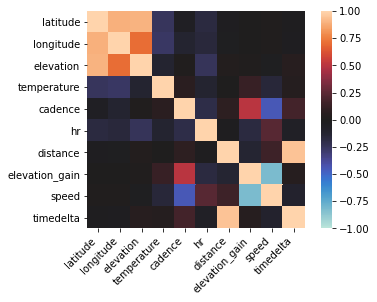

In [6]:
# Make a correlation matrix heatmap to visualise it better
import seaborn as sns
corr = new_df.corr()
ax = sns.heatmap(corr, 
                 vmin = -1,
                 vmax=1,
                 center=0,
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

-3.799999999999997


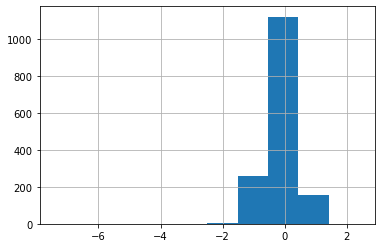

In [18]:
tt_2016.elevation_gain.hist()
print(tt_2016.elevation_gain.sum())

1.0

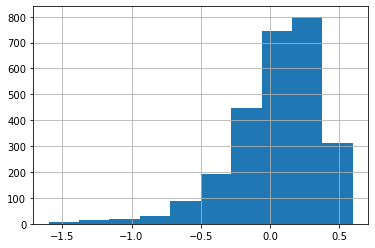

In [19]:
tt_2019.elevation_gain.hist()
tt_2019.elevation_gain.sum()

- ## Summary for 2016 Road Race 

In [9]:
rr_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2821.000000
mean,-33.368017,151.225527,232.404465,25.280652,0.0,65.987952,158.394401,0.017381,-0.003756,34.933085,1.843318
std,0.028329,0.006014,29.725934,1.348746,0.0,34.425881,11.304588,0.015695,0.458872,10.738677,1.692364
min,-33.416753,151.211496,176.000000,24.000000,0.0,0.000000,102.000000,0.000000,-1.600000,0.000000,1.000000
25%,-33.393691,151.221912,209.450000,24.000000,0.0,68.000000,151.000000,0.007894,-0.400000,26.656312,1.000000
50%,-33.371820,151.227236,226.100000,25.000000,0.0,79.000000,158.000000,0.011794,0.000000,33.307339,1.000000
75%,-33.342269,151.230069,258.200000,26.000000,0.0,87.000000,166.000000,0.016899,0.400000,42.871885,2.000000
max,-33.316890,151.235131,295.800000,30.000000,0.0,117.000000,205.000000,0.076283,1.200000,92.749036,9.000000


- ## Summary for 2019 Road Race

In [10]:
rr_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5502.0
mean,-33.371644,151.225232,243.243576,5.997819,213.617845,70.004906,138.998546,0.009411,0.000254,33.879861,1.0
std,0.030592,0.006142,30.197981,0.806414,144.123686,29.869938,16.184123,0.002459,0.347322,8.853503,0.0
min,-33.422174,151.211507,185.200000,0.000000,0.000000,0.000000,71.000000,0.000000,-2.000000,0.000000,1.0
25%,-33.396939,151.221591,219.600000,5.000000,104.000000,66.000000,129.000000,0.007839,-0.200000,28.219962,1.0
50%,-33.373835,151.227064,236.000000,6.000000,212.000000,81.000000,142.000000,0.009178,0.000000,33.041360,1.0
75%,-33.344994,151.229977,269.600000,7.000000,308.000000,89.000000,152.000000,0.010733,0.200000,38.640026,1.0
max,-33.316865,151.235094,310.400000,7.000000,785.000000,120.000000,170.000000,0.019547,1.000000,70.370469,1.0


- ## Summary for 2016 Time Trials 

In [11]:
tt_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1540.000000
mean,-33.368105,151.225411,139.068657,10.953277,0.0,83.277093,170.939650,0.016095,-0.002466,33.529963,1.783766
std,0.028055,0.006166,30.301132,0.657937,0.0,21.169978,23.392548,0.015897,0.515343,11.519681,1.822713
min,-33.418368,151.211206,85.000000,10.000000,0.0,0.000000,100.000000,0.000000,-7.400000,0.000000,1.000000
25%,-33.393795,151.221870,116.200000,11.000000,0.0,77.000000,157.000000,0.007622,-0.400000,25.068271,1.000000
50%,-33.370613,151.227333,134.000000,11.000000,0.0,86.000000,161.000000,0.010974,0.000000,32.840076,1.000000
75%,-33.343332,151.230072,165.400000,11.000000,0.0,96.000000,180.000000,0.015960,0.400000,41.470522,2.000000
max,-33.316888,151.235137,202.600000,13.000000,0.0,118.000000,251.000000,0.288175,2.400000,162.505764,31.000000


- ##  Summary for 2019 Time Trials 

In [12]:
tt_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2654.0
mean,-33.368391,151.225397,250.435104,10.194350,257.566855,89.979661,152.741243,0.009183,0.000377,33.057824,1.0
std,0.028682,0.006234,29.434104,0.833934,80.023555,17.543883,8.217632,0.002715,0.298628,9.773522,0.0
min,-33.415798,151.211507,195.800000,9.000000,0.000000,0.000000,88.000000,0.000000,-1.600000,0.000000,1.0
25%,-33.394910,151.221400,229.200000,10.000000,213.500000,88.000000,150.000000,0.007345,-0.200000,26.440757,1.0
50%,-33.370118,151.227363,243.800000,10.000000,264.000000,94.000000,153.000000,0.009228,0.000000,33.220108,1.0
75%,-33.343803,151.230040,276.200000,10.000000,308.000000,98.000000,158.000000,0.010913,0.200000,39.286242,1.0
max,-33.316882,151.235098,312.200000,13.000000,522.000000,111.000000,166.000000,0.017584,0.600000,63.300734,1.0


## *There are the summary of the each ride*

In [24]:
print("Overall distance in Road Race in 2016:",rr_2016.distance.sum(),"km",",","Average speed :",rr_2016.speed.mean(),"km/h",",","Average tempeature:",rr_2016.temperature.mean(),",","Average Heart Rate:",rr_2016.hr.mean(),",","The period mins:",rr_2016.timedelta.sum()/60)
print("Overall distance in Road Race in 2019:",rr_2019.distance.sum(),"km",",","Average speed :",rr_2019.speed.mean(),"km/h",",","Average tempeature:",rr_2019.temperature.mean(),",","Average Heart Rate:",rr_2019.hr.mean(),",","The period in mins:",rr_2019.timedelta.sum()/60)
print("Overall distance in Time Trials in 2016:",tt_2016.distance.sum(),"km",",","Average speed :",tt_2016.speed.mean(),"km/h",",","Average tempeature:",tt_2016.temperature.mean(),",","Average Heart Rate:",tt_2016.hr.mean(),",","The period in mins:",tt_2016.timedelta.sum()/60)
print("Overall distance in Time Trials in 2019:",tt_2019.distance.sum(),"km",",","Average speed :",tt_2019.speed.mean(),"km/h",",","Average tempeature:",tt_2019.temperature.mean(),",","Average Heart Rate:",tt_2019.hr.mean(),",","The period in mins:",tt_2019.timedelta.sum()/60)


Overall distance in Road Race in 2016: 49.04858574628638 km , Average speed : 34.93308475482947 km/h , Average tempeature: 25.280652019844084 , Average Heart Rate: 158.39440113394755 , The period mins: 86.66666666666667
Overall distance in Road Race in 2019: 51.7891325359606 km , Average speed : 33.87986137188044 km/h , Average tempeature: 5.997819371252044 , Average Heart Rate: 138.99854624750137 , The period in mins: 91.7
Overall distance in Time Trials in 2016: 24.80288703130808 km , Average speed : 33.52996304869014 km/h , Average tempeature: 10.953277092796885 , Average Heart Rate: 170.93964957819597 , The period in mins: 45.78333333333333
Overall distance in Time Trials in 2019: 24.38014504376575 km , Average speed : 33.05782378815691 km/h , Average tempeature: 10.194350282485876 , Average Heart Rate: 152.74124293785312 , The period in mins: 44.233333333333334


## Whole speed for each ride in 2016 and 2019

In [16]:
speed_2016rr=((rr_2016.distance.sum())/(rr_2016.timedelta.sum())*60)
speed_2019rr=((rr_2019.distance.sum())/(rr_2019.timedelta.sum())*60)
speed_2016tt=((tt_2016.distance.sum())/(tt_2016.timedelta.sum())*60)
speed_2019tt=((tt_2019.distance.sum())/(tt_2019.timedelta.sum())*60)
print("Year-2016 Race Road Speed in km/min:",speed_2016rr)
print("Year-2019 Race Road Speed in km/min:",speed_2019rr)
print("Year-2016 Time Trials Speed in km/min:",speed_2016tt)
print("Year-2019 Time Trials Speed in km/min:",speed_2019tt)

Year-2016 Race Road Speed in km/min: 0.5659452201494581
Year-2019 Race Road Speed in km/min: 0.5647669851249792
Year-2016 Time Trials Speed in km/min: 0.5417448932939515
Year-2019 Time Trials Speed in km/min: 0.5511713272893539


## Compare each ride in Year-2016 and Year-2019

In [17]:
print("Whether in Year-2016 Race Road is faster than Time Trials or not?",speed_2016rr>speed_2016tt)
print("Whether in Year-2019 Race Road is faster than Time Trials or not?",speed_2019rr>speed_2019tt)

Whether in Year-2016 Race Road is faster than Time Trials or not? True
Whether in Year-2019 Race Road is faster than Time Trials or not? True


***According to above results Time Trials is slower* than Race Road**

## Compare the speeds achieved in the two time trials (three years apart)

In [25]:
print("Whether in Year-2016 Race Road is faster than Year-2019 ?",speed_2016rr>speed_2019rr)
print("Whether in Year-2016 Time Trials is faster than Year-2019 ?",speed_2016tt>speed_2019tt)

Whether in Year-2016 Race Road is faster than Year-2019 ? True
Whether in Year-2016 Time Trials is faster than Year-2019 ? False


***According to above results we can see in the races in Year-2016 are faster than Year-2019***

## Compare the average speed in each ride

- 2016 Road Race VS 2019 Road Race

In [26]:
rr2016avs=rr_2016.speed.mean()
rr2019avs=rr_2019.speed.mean()
rr2019avs>rr2016avs


False

- 2016 Time Trials VS 2019 Time Trials

In [27]:
tt2016avs=tt_2016.speed.mean()
tt2019avs=tt_2019.speed.mean()
tt2019avs>tt2016avs

False

***Compared the average of speed 2016's ride is faster than 2019***

## Compare Road Race distance with same time period between 2016 and 2019 with average speed


In [30]:
rrd_2016=((rr_2016.speed.mean())*(rr_2016.timedelta.sum()))
rrd_2019=((rr_2019.speed.mean())*(rr_2016.timedelta.sum()))
print("Distance in 2016 Road Race:",rrd_2016,'km')
print("Distance in 2019 Road Race:",rrd_2019,'km')
print("2016 is faster than 2019 ?",rrd_2016>rrd_2019)

Distance in 2016 Road Race: 181652.04072511327 km
Distance in 2019 Road Race: 176175.27913377827 km
2016 is faster than 2019 ? True


***As we can determited distance with the same period 2016 is still faster than 2019***

## From the elevation_gain 

- ## Descending

In [35]:
descending_rr2016=rr_2016[(((rr_2016.elevation_gain)>=(rr_2016.elevation_gain.min()))&((rr_2016.elevation_gain)<=-0.40))]
spdrr_2016=((descending_rr2016.distance.sum())/(descending_rr2016.timedelta.sum())*3600)
print("Descending Road Race in 2016:",spdrr_2016,"km/hrs")


Descending Road Race in 2016: 45.62214642813049 km/hrs


In [37]:
descending_rr2019=rr_2019[(((rr_2019.elevation_gain)>=(rr_2019.elevation_gain.min()))&((rr_2019.elevation_gain)<=-0.20))]
spdrr_2019=((descending_rr2019.distance.sum())/(descending_rr2019.timedelta.sum())*3600)
print("Descending Road Race in 2019:",spdrr_2019,"km/hrs")

Descending Road Race in 2019: 43.55897340707479 km/hrs


In [40]:
descending_tt2016=tt_2016[(((tt_2016.elevation_gain)>=(tt_2016.elevation_gain.min()))&((tt_2016.elevation_gain)<=-0.400000))]
spdtt_2016=((descending_tt2016.distance.sum())/(descending_tt2016.timedelta.sum())*3600)
print("Descending Time Trials in 2016:",spdtt_2016,"km/hrs")

Descending Time Trials in 2016: 43.35583303749934 km/hrs


In [41]:
descending_tt2019=tt_2019[(((tt_2019.elevation_gain)>=(tt_2019.elevation_gain.min()))&((tt_2019.elevation_gain)<=-0.200000))]
spdtt_2019=((descending_tt2019.distance.sum())/(descending_tt2019.timedelta.sum())*3600)
print("Descending Time Trials in 2019:",spdtt_2019,"km/hrs")

Descending Time Trials in 2019: 45.067210607276294 km/hrs


- ## Flat

In [43]:
flat_rr2016=rr_2016[((((rr_2016.elevation_gain)>-0.400000))&((rr_2016.elevation_gain)<=0.4))]
spfrr_2016=((flat_rr2016.distance.sum())/(flat_rr2016.timedelta.sum())*3600)
print("Flat Road Race in 2016:",spfrr_2016,"km/hrs")

Flat Road Race in 2016: 33.36551943983799 km/hrs


In [45]:
flat_rr2019=rr_2019[((((rr_2019.elevation_gain)>-0.200000))&((rr_2019.elevation_gain)<=0.2))]
spfrr_2019=((flat_rr2019.distance.sum())/(flat_rr2019.timedelta.sum())*3600)
print("Flat Road Race in 2019:",spfrr_2019,"km/hrs")

Flat Road Race in 2019: 32.768852214172426 km/hrs


In [46]:
flat_tt2016=tt_2016[((((tt_2016.elevation_gain)>-0.400000))&((tt_2016.elevation_gain)<=0.4))]
spftt_2016=((flat_tt2016.distance.sum())/(flat_tt2016.timedelta.sum())*3600)
print("Flat Time Trials in 2016:",spftt_2016,"km/hrs")

Flat Time Trials in 2016: 32.48860381278661 km/hrs


In [47]:
flat_tt2019=tt_2019[((((tt_2019.elevation_gain)>-0.200000))&((tt_2019.elevation_gain)<=0.2))]
spftt_2019=((flat_tt2019.distance.sum())/(flat_tt2019.timedelta.sum())*3600)
print("Flat Time Trials in 2019:",spftt_2019,"km/hrs")

Flat Time Trials in 2019: 32.14861983641569 km/hrs


- ## Climbing

In [50]:
climbing_rr2016=rr_2016[(((rr_2016.elevation_gain)>0.4)&(rr_2016.elevation_gain<=rr_2016.elevation_gain.max()))]
spcrr_2016=((climbing_rr2016.distance.sum())/(climbing_rr2016.timedelta.sum())*3600)
print("Climbing Road Race in 2016:",spcrr_2016,"km/hrs")

Climbing Road Race in 2016: 26.602414724682824 km/hrs


In [51]:
climbing_rr2019=rr_2019[(((rr_2019.elevation_gain)>0.2)&(rr_2019.elevation_gain<=rr_2019.elevation_gain.max()))]
spcrr_2019=((climbing_rr2019.distance.sum())/(climbing_rr2019.timedelta.sum())*3600)
print("Climbing Road Race in 2019:",spcrr_2019,"km/hrs")

Climbing Road Race in 2019: 28.323161909707263 km/hrs


In [52]:
climbing_tt2016=tt_2016[(((tt_2016.elevation_gain)>0.4)&(tt_2016.elevation_gain<=tt_2016.elevation_gain.max()))]
spctt_2016=((climbing_tt2016.distance.sum())/(climbing_tt2016.timedelta.sum())*3600)
print("Climbing Time Trials in 2016:",spctt_2016,"km/hrs")

Climbing Time Trials in 2016: 24.61707372398255 km/hrs


In [53]:
climbing_tt2019=tt_2019[(((tt_2019.elevation_gain)>0.2)&(tt_2019.elevation_gain<=tt_2019.elevation_gain.max()))]
spctt_2019=((climbing_tt2019.distance.sum())/(climbing_tt2019.timedelta.sum())*3600)
print("Climbing Time Trials in 2019:",spctt_2019,"km/mins")

Climbing Time Trials in 2019: 25.065537322730982 km/mins


<AxesSubplot:>

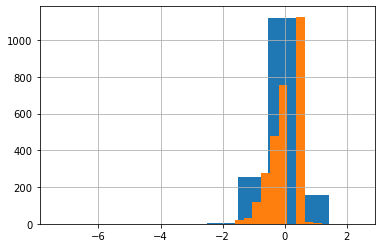

In [54]:
# make a boxplots shows in 2016 races both are close to normal distribution 
tt_2016['elevation_gain'].hist(density = 0, histtype = "stepfilled",bins=10)
rr_2016['elevation_gain'].hist(density = 0, histtype = "stepfilled",bins=10)


<AxesSubplot:>

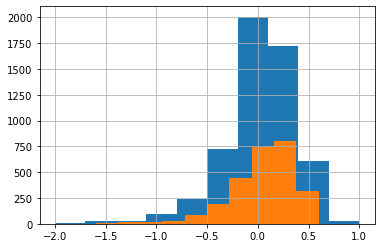

In [55]:
# in 2019 races both boxplots are left skewed on the negative side 
rr_2019['elevation_gain'].hist(density = 0, histtype = "stepfilled",bins=10)
tt_2019['elevation_gain'].hist(density = 0, histtype = "stepfilled",bins=10)


## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





There number of  outliers should be moved : 612
Unremoved unmber for 2019 Road Race is: 2822


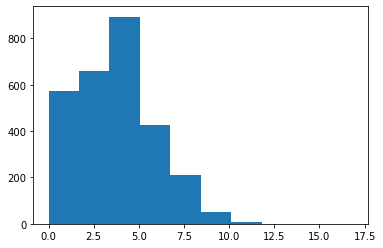

In [56]:
#unremove outliers in 2016 Road Race
import matplotlib.pyplot as plt

newspeed=((rr_2016.speed)/600)
development=newspeed*(rr_2016.cadence)
plt.hist(development)
count=0
for outlier in development:
    if outlier <2:
        count+=1
    elif outlier>10:
        count+=1

print("There number of  outliers should be moved :",count)
print("Unremoved unmber for 2019 Road Race is:",len(development))

Afyer removed outlier in 2016 Road Race the length is : 2210


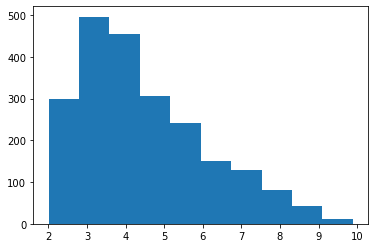

In [57]:
#remove outliers in 2016 Road Race
rr2016_clean = rr_2016.drop(rr_2016.index[(((rr_2016.cadence)*(rr_2016.speed)/600)<2 )
                                           | (((rr_2016.cadence)*(rr_2016.speed)/600)>10)] )
newspeed3=((rr2016_clean.speed)/600)
development3=((rr2016_clean.cadence)*(newspeed3))
plt.hist(development3)
print("Afyer removed outlier in 2016 Road Race the length is :",len(development3))

- In 2016 Road Race ,we can see there is a clearly right tail are skewed on the positive side , and we got the most develope between 3-4 miles only few in 9-10 miles .Moreover , after removed the data excepte less 2 miles and 10 miles the whole distrubution have not too much changed ,which means the outliers have less influence 

There number of  outliers should be moved : 612
Unremoved unmber for 2019 Road Race is: 5503


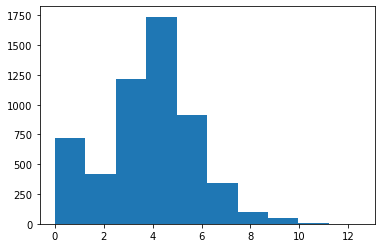

In [58]:
#unremove outliers in 2019 Road Race
newspeed2=((rr_2019.speed)/600)
development2=((rr_2019.cadence)*(newspeed2))
plt.hist(development2)

count2=0
for outlier2 in development:
    if outlier2 <2:
        count2+=1
    elif outlier2>10:
        count2+=1

print("There number of  outliers should be moved :",count2)

print("Unremoved unmber for 2019 Road Race is:",len(development2))

After drop the outlier in 2019 Road Race the length is : 4591


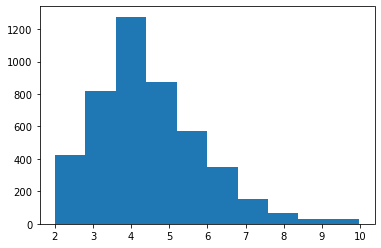

In [59]:
#removes outliers in 2019 Road race
rr2019_clean = rr_2019.drop(rr_2019.index[(((rr_2019.cadence)*(rr_2019.speed)/600)<2 )
                                           | (((rr_2019.cadence)*(rr_2019.speed)/600)>10)] )
newspeed4=((rr2019_clean.speed)/600)
development4=((rr2019_clean.cadence)*(newspeed4))
plt.hist(development4)
print("After drop the outlier in 2019 Road Race the length is :",len(development4))

- In 2019 Road Race ,we can see there is a lightly right tail are skewed on the positive side , and we got the most develope between 3-4 miles only few in 8-10 miles .Moreover , after removed the data excepte less 2 miles and 10 miles the whole distrubution more clearly

There number of  outliers should be moved : 156
Unremoved unmber for 2016 Time Trials is: 1541


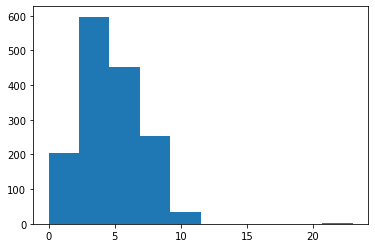

In [60]:
#Unremove 2016 Time Trials 
newspeed51=((tt_2016.speed)/600)
development51=((tt_2016.cadence)*(newspeed51))
plt.hist(development51)

count51=0
for outlier51 in development51:
    if outlier51<2:
        count51+=1
    elif outlier51>10:
        count51+=1

print("There number of  outliers should be moved :",count51)

print("Unremoved unmber for 2016 Time Trials is:",len(development51))

After drop the outlier in 2016 Road Race the length is : 1385


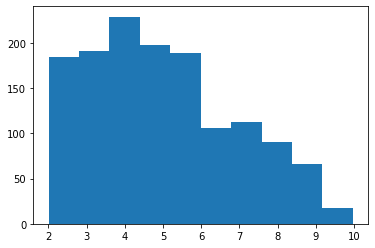

In [61]:
# remove outliers in 2016 Time Trials
tt2016_clean = tt_2016.drop(tt_2016.index[(((tt_2016.cadence)*(tt_2016.speed)/600)<2 )
                                           | (((tt_2016.cadence)*(tt_2016.speed)/600)>10)] )
newspeed5=((tt2016_clean.speed)/600)
development5=((tt2016_clean.cadence)*(newspeed5))
plt.hist(development5)
print("After drop the outlier in 2016 Road Race the length is :",len(development5))

- after removed outliers we can get clearly right skewed distribution and development from 2 miles to 6 miles take a large part in 2016 Time Trials 


There number of  outliers should be moved : 161
Unremoved unmber for 2019 Time Trials is: 2655


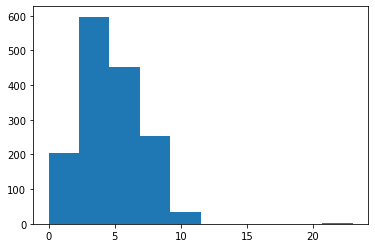

In [62]:
#Unremove outliers 2019 TIME Trials 
newspeed61=((tt_2019.speed)/600)
development61=((tt_2019.cadence)*(newspeed61))
plt.hist(development51)

count61=0
for outlier61 in development61:
    if outlier61<2:
        count61+=1
    elif outlier61>10:
        count61+=1

print("There number of  outliers should be moved :",count61)

print("Unremoved unmber for 2019 Time Trials is:",len(development61))

After drop the outlier in 2019 Time Trials the length is : 2494


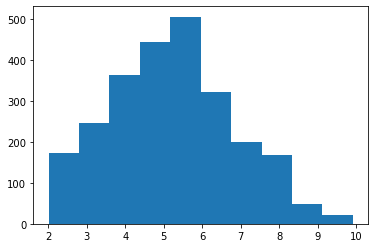

In [63]:
#reomove outliers 2019 Time Trials 
tt2019_clean = tt_2019.drop(tt_2019.index[(((tt_2019.cadence)*(tt_2019.speed)/600)<2 )
                                           | (((tt_2019.cadence)*(tt_2019.speed)/600)>10)] )
newspeed6=((tt2019_clean.speed)/600)
development6=((tt2019_clean.cadence)*(newspeed6))
plt.hist(development6)
print("After drop the outlier in 2019 Time Trials the length is :",len(development6))

- In 2019 Time Trials after removed the outliers we can get a clearly a normal distribution compared to unremoved, development range from 5 - 6 miles have a highly  appread

- in a sum , bike races in road races have more  clmbing while Time Trials may have more varieties geography.